In [34]:
import numpy as np
from numpy.random import randint
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mn
import matplotlib
%matplotlib inline

In [35]:
I = np.array([[1, 0], [0, 1]])
blue_mean_rv = mn([1, 0], I)
red_mean_rv = mn([0, 1], I)
blue_rv = [mn(blue_mean_rv.rvs(), I/5) for _ in range(10)]
red_rv = [mn(red_mean_rv.rvs(), I/5) for _ in range(10)]
rvs = {'blue': blue_rv, 'red': red_rv}

In [36]:
def byes(x):
    p_red, p_blue = 0, 0
    for r in rvs['blue']:
        p_blue += r.pdf(x)
    for r in rvs['red']:
        p_red += r.pdf(x)
    return int(p_red > p_blue)

In [37]:
X, Y = np.zeros(shape=(200, 2)), np.zeros(shape=(200, 1))
for v, color in enumerate(rvs.keys()):
    for i in range(100):
        X[100*v+i] = rvs[color][randint(10)].rvs()
        Y[100*v+i] = v

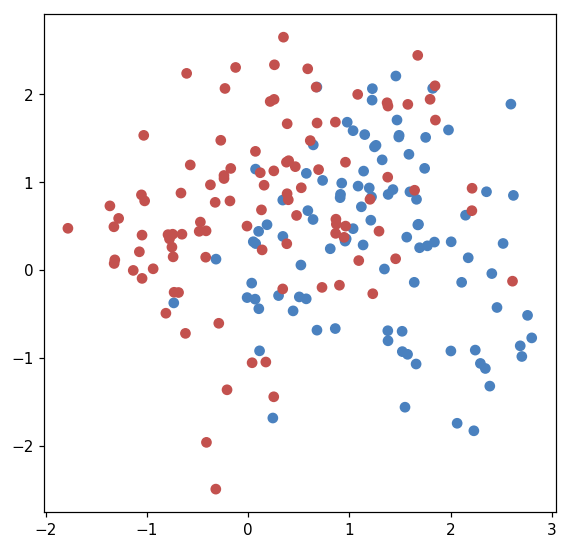

In [38]:
fig, ax1 = plt.subplots(figsize=(6, 6), dpi=110)

cmap = matplotlib.colors.ListedColormap(['#4A81BF', '#C3514E'])
ax1.scatter(X[:,0], X[:,1], c=Y[:,0], cmap=cmap)

In [39]:
x_min = np.amin(X, axis=0)
x_max = np.amax(X, axis=0)

In [40]:
X_b = np.zeros(shape=(10000, 2))
Y_b = np.zeros(shape=(10000, 1))
l = 0
for x1 in np.linspace(x_min[0], x_max[0], 100):
    for x2 in np.linspace(x_min[1], x_max[1], 100):
        X_b[l] = [x1, x2]
        Y_b[l] = byes(X_b[l])
        l += 1

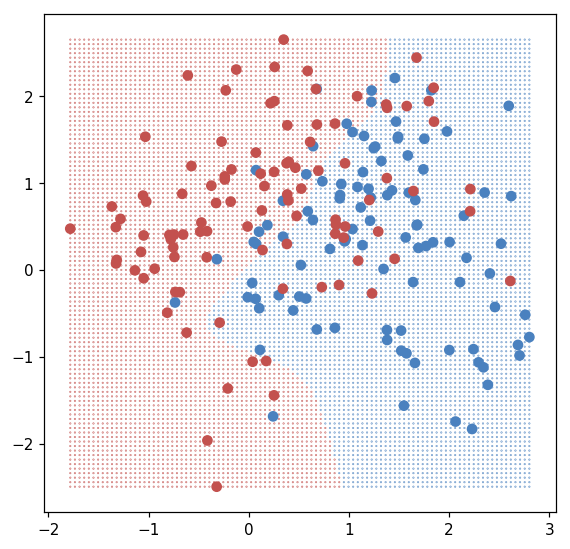

In [41]:
#plt.scatter(x_grid, y_grid, c=colors)
#plt.contour(x_grid, y_grid, colors, colors='black', linewidths=1)
#plt.scatter(blue[:, 0], blue[:,1],c='blue')
#plt.scatter(red[:, 0], red[:,1],c='red')
fig, ax1 = plt.subplots(figsize=(6, 6), dpi=110)
ax1.scatter(X_b[:,0], X_b[:,1], c=Y_b[:,0], s=0.1, cmap=cmap)
cmap = matplotlib.colors.ListedColormap(['#4A81BF', '#C3514E'])
ax1.scatter(X[:,0], X[:,1], c=Y[:,0], cmap=cmap)

In [42]:
X_test, Y_test = np.zeros(shape=(10000, 2)), np.zeros(shape=(10000, 1))
for v, color in enumerate(rvs.keys()):
    for i in range(5000):
        X_test[100*v+i] = rvs[color][randint(10)].rvs()
        Y_test[100*v+i] = v

In [43]:
Y_test_hat_b = np.zeros(shape=(10000, 1))
for i in range(10000):
    Y_test_hat_b[i] = byes(X_test[i])

In [44]:
(Y_test - Y_test_hat_b).T.dot(Y_test - Y_test_hat_b) / 10000

array([[0.1528]])